# Let's Grow More Data Science Virtual Internship Program june 2023

# LGMVIP june 2023

## BY: Syed Ameen Ikhlaas H 

### ADVANCED LEVEL TASK

## TASK 7: Prediction using Decision Tree  Algorithm

Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

### Loading the dataset

In [2]:
iris = pd.read_csv('C:\\Users\\user\\Downloads\\iris\\iris.data',
                  names = ['sepal length','sepal width','petal length',
                                   'petal width','class'])

### Exploratory Data Analysis [EDA]

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
iris.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

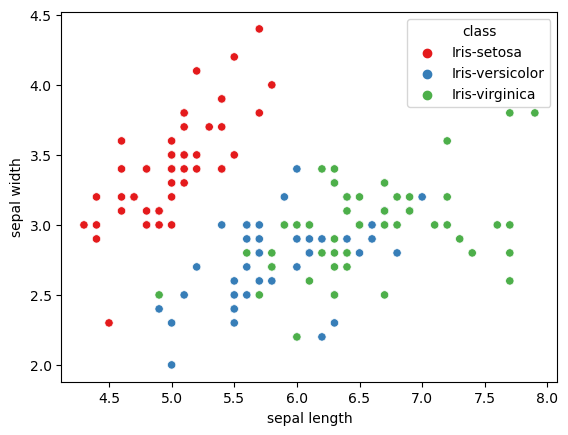

In [9]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris, palette = 'Set1')

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

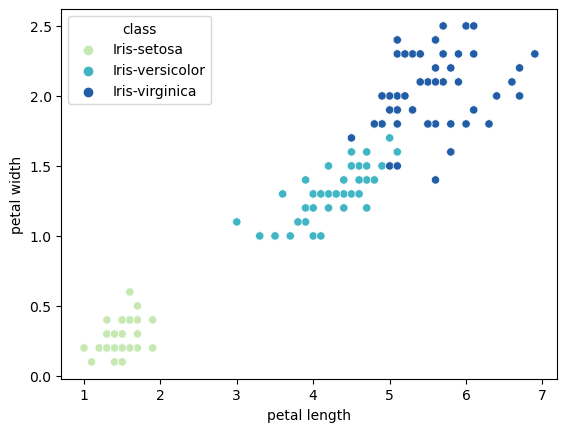

In [10]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=iris, palette = 'YlGnBu' )

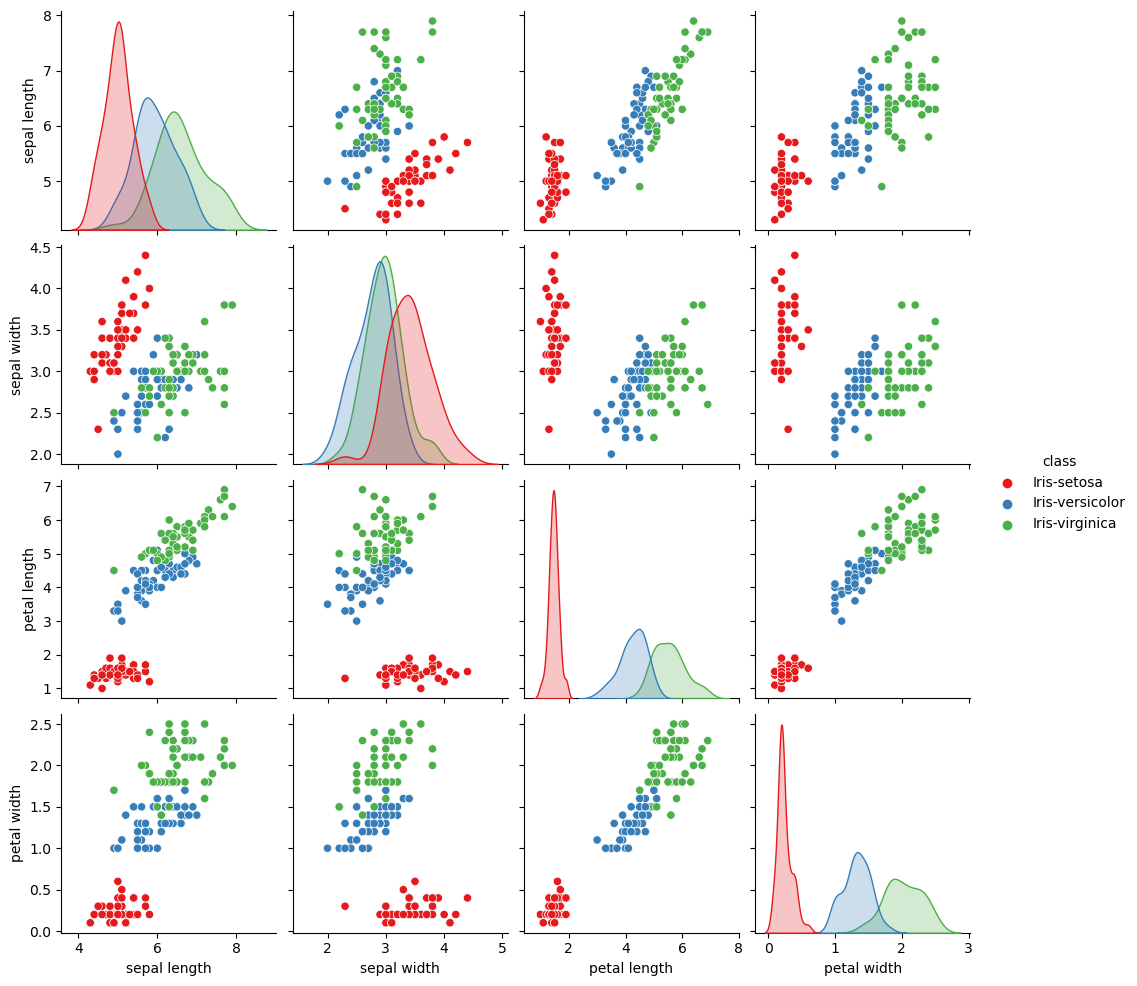

In [11]:
sns.pairplot(iris, hue = 'class', palette = 'Set1')

<AxesSubplot:xlabel='class', ylabel='petal width'>

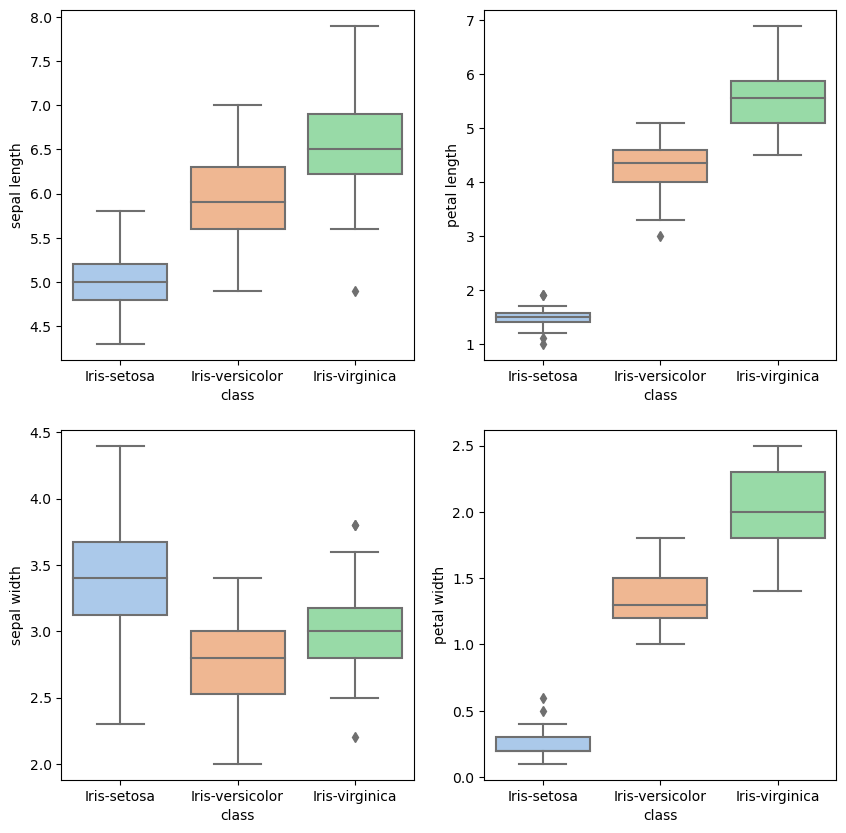

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'sepal length', x = 'class', data = iris, palette = 'pastel')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'petal length', x = 'class', data = iris, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'sepal width', x = 'class', data = iris, palette = 'pastel')


plt.subplot(2,2,4)
sns.boxplot(y = 'petal width', x = 'class', data = iris, palette = 'pastel')

### Preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
iris['class'] = label_encoder.fit_transform(iris['class'])

In [14]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = iris.drop(['class'], axis = 1)
Y = iris['class']

In [16]:
print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [17]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32


#### Splitting the train and test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75,stratify=Y, test_size = 0.25, random_state = 10)

In [19]:
X_train.shape

(112, 4)

In [20]:
X_test.shape

(38, 4)

### Model Building and Evaluation

In [21]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

In [22]:
print(accuracy_score(Y_test, Y_pred)*100)

97.36842105263158


In [23]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



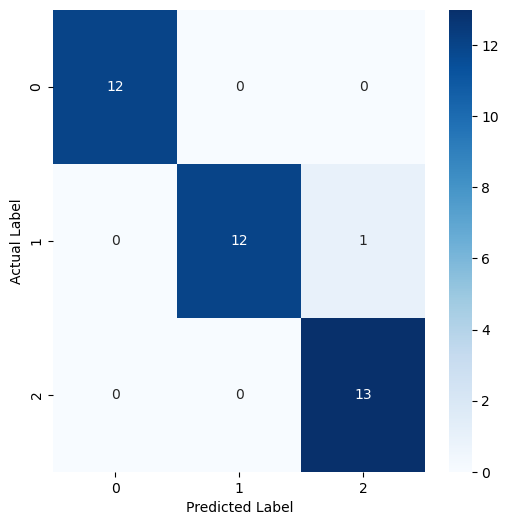

In [24]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Making predictions on a random sample

In [25]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) #Prediction should be Iris-Verginica
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Visualizing the decision tree

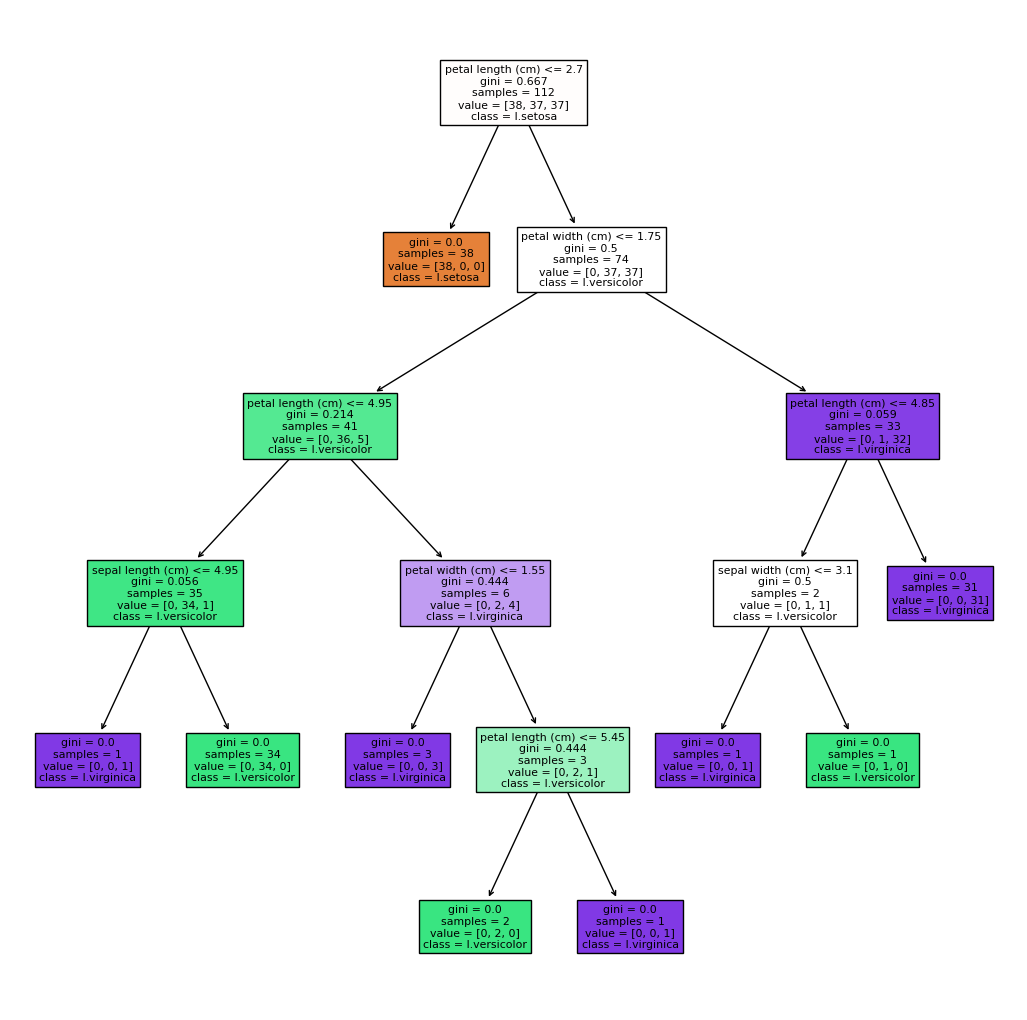

In [26]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['I.setosa', 'I.versicolor', 'I.virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);